In [5]:
!pip install numpy librosa scipy matplotlib pedalboard synthesizer

  Preparing metadata (setup.py) ... done
  Using cached enum34-1.1.10-py3-none-any.whl (11 kB)
  Created wheel for synthesizer: filename=synthesizer-0.2.0-py2.py3-none-any.whl size=5879 sha256=bf00f3c6ac03fe2d4f41723c0de2f0e3a14933999ed2630fba8933f4f05a6ba7
  Stored in directory: /Users/vedant/Library/Caches/pip/wheels/00/07/f7/f6919b025939c72812e61e71bf3316e38bb4f740f661d70a18
Successfully built synthesizer


In [6]:
!brew install portaudio

Running `brew update --auto-update`...
==> Auto-updated Homebrew!
Updated 5 taps (ngrok/ngrok, heroku/brew, homebrew/core, homebrew/cask and caskroom/cask).
==> New Formulae
agg                                      mesheryctl
aws2-wrap                                mkp224o
berkeley-db@5                            nmrpflash
bfgminer                                 ocl-icd
burst                                    onlykey-agent
c2rust                                   open62541
cargo-crev                               openvi
cargo-depgraph                           ouch
cargo-nextest                            page
cargo-udeps                              pint
censys                                   pixiewps
chain-bench                              pkcs11-tools
cpp-httplib                              pocl
cql-proxy                                protobuf@3
create-api                               prql-compiler
crytic-compile                           prr
dsda-doom                      

In [7]:
!pip install pyaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 751.8 kB/s eta 0:00:00 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudio: filename=PyAudio-0.2.12-cp310-cp310-macosx_10_9_x86_64.whl size=24821 sha256=1b64278bb026f88f37597c059d55127c55cf8b3162dcaed69691b806cf03114b
  Stored in directory: /Users/vedant/Library/Caches/pip/wheels/eb/71/06/030b8fdda053802be6a3c6b13b39bb7cb1bd196d9459b6e0f9
Successfully built pyaudio


In [81]:
from synthesizer import Player, Synthesizer, Waveform

player = Player()
player.open_stream()
synthesizer = Synthesizer()
chord = ["C4", "E4", "G4"]
player.play_wave(synthesizer.generate_chord(chord, 3.0))

In [82]:
import pedalboard
synth = pedalboard.load_plugin("/Library/Audio/Plug-Ins/Components/TAL-NoiseMaker.component")

In [122]:
# print(synth.parameters.keys())
vst_params = list(synth.parameters.keys())
d={}
for idx, ele in enumerate(vst_params):
    # print(idx, ele)
    d[ele] = ele.replace("_", "")

In [95]:
import xml.etree.ElementTree as ET
xmlfile="../resources/plugins/params/PD Base Pad TAL.noisemakerpreset"
tree = ET.parse(xmlfile)
root = tree.getroot()
for item in root.findall('./programs'):
    main_params = dict(item[0].items())
for item in root.findall('./programs/program/splinePoints'):
    spline_params={}
    for i in range(len(item)):
        spline_params[i] = dict(item[0].items())

In [97]:
main_params == vst_params

False

In [101]:
vst_params == main_params.keys()

False

In [119]:
vst_params

['mastervolume',
 'filtertype',
 'filtercutoff',
 'filterresonance',
 'fitlerkeyfollow',
 'filtercontour',
 'filterattack',
 'filterdecay',
 'filtersustain',
 'filterrelease',
 'ampattack',
 'ampdecay',
 'ampsustain',
 'amprelease',
 'osc1volume',
 'osc2volume',
 'osc3volume',
 'oscmastertune',
 'osc1tune',
 'osc2tune',
 'osc1finetune',
 'osc2finetune',
 'osc1waveform',
 'oscsync',
 'lfo1waveform',
 'lfo2waveform',
 'lfo1rate',
 'lfo2rate',
 'lfo1amount',
 'lfo2amount',
 'lfo1destination',
 'lfo2destination',
 'lfo1phase',
 'lfo2phase',
 'osc2fm',
 'osc2phase',
 'osc2pw',
 'transpose',
 'freeadattack',
 'freeaddecay',
 'freeadamount',
 'freeaddestination',
 'lfo1sync',
 'lfo1keytrigger',
 'lfo2sync',
 'lfo2keytrigger',
 'portamentoamount',
 'portamentomode',
 'voices',
 'velocityvolume',
 'velocitycontour',
 'velocityfilter',
 'pitchwheelcutoff',
 'pitchwheelpitch',
 'ringmodulation',
 'chorus1enable',
 'chorus2enable',
 'reverbwet',
 'reverbdecay',
 'reverbpredelay',
 'reverbhighcut',

In [109]:
l = [];
missing=[]
for param in main_params.keys():
    if param in vst_params:
        l.append(True);
    else:
        l.append(False);
        missing.append(param)


In [111]:
missing

['programname',
 'unknown',
 'volume',
 'cutoff',
 'resonance',
 'keyfollow',
 'osc2waveform',
 'lfo1Phase',
 'lfo2Phase',
 'osc1pw',
 'osc1phase',
 'portamento',
 'highpass',
 'detune',
 'envelopeeditordest1',
 'envelopeeditorspeed',
 'envelopeeditoramount',
 'envelopeOneShot',
 'delayfactorl',
 'delayfactorR']

In [125]:
d_flipped = dict(zip(d.values(), d.keys()))

In [134]:
synth.parameters[d_flipped[parameter]]

<pedalboard.AudioProcessorParameter name="MIDI Lock" raw_value=0 value=0.0000000 range=(0.0, 1.0, 0.001)>

In [135]:
!pip install py-headless-daw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.7/83.7 kB 1.4 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 9.3 MB/s eta 0:00:00ta 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.2/830.2 kB 8.1 MB/s eta 0:00:0000:0100:01
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [27 lines of output]
      unzip build/vstsdk.zip -d build
      Archive:  build/vstsdk.zip
      replace build/VST_SDK/VST3_Project_Generator/macOS/VST3_Project_Generator.app/Contents/CodeResources? [y]es, [n]o, [A]ll, [N]one, [r]ename:  NULL
      (EOF or read error, treating as "[N]one" ...)
      make: *** [build/vstsdk] Error 1
      running bdist_wheel
      running build
      running build_py
      creating build/lib.macosx-10.9-x86_64-cpython-310
      creating build/lib.macosx-10.9-x86_64-cpython-310/cython_vst_loader
      copying cython_vst_loader/vst_con

In [139]:
!git clone git@github.com:hq9000/cython-vst-loader.git;cd cython-vst-loader; pip install -r requirements.txt;python setup.py build_ext --inplace

fatal: destination path 'cython-vst-loader' already exists and is not an empty directory.
  Using cached attrs-19.3.0-py2.py3-none-any.whl (39 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.8/83.8 kB 2.8 MB/s eta 0:00:00
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.4/247.4 kB 6.5 MB/s eta 0:00:00
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.4 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.2 MB/s eta 0:00:00
  Using cached mccabe-0.6.1-py2.py3-none-any.whl (8.6 kB)
  Attempting uninstall: wcwidth
    Found existing installation: wcwidth 0.2.5
    Uninstalling wcwidt

In [4]:
from reathon.nodes import Item, Track, Project# import all of the reathon nodes
item = Item(
    length = 10, 
    position = 0.0
)
track = Track(item)
project = Project( # create an instance of a project
    track # and pass a Track() object to the constructor
)

project.write("../resources/basic_test.rpp") # write the project out to the path

In [1]:
!pip install dawdreamer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 MB 10.6 MB/s eta 0:00:0000:0100:01


In [3]:
import dawdreamer as daw
import numpy as np
import os
SAMPLE_RATE = 44100

BUFFER_SIZE = 128 # Parameters will undergo automation at this buffer/block size.
PPQN = 960 # Pulses per quarter note.
SYNTH_PLUGIN = os.path.expanduser('~')+"/../../Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst"#os.path.expanduser('~')+"/../../Library/Audio/Plug-Ins/Components/TAL-NoiseMaker.component"  # extensions: .dll, .vst3, .vst, .component
# REVERB_PLUGIN = "C:/path/to/reverb.dll"  # extensions: .dll, .vst3, .vst, .component
MIDI_PATH = "../resources/MIDI/song.mid"

In [4]:
engine = daw.RenderEngine(SAMPLE_RATE, BUFFER_SIZE)

# Make a processor and give it the unique name "my_synth", which we use later.
synth = engine.make_plugin_processor("my_synth", SYNTH_PLUGIN)
assert synth.get_name() == "my_synth"

# IGNORE THE PRINTED ERROR "error: attempt to map invalid URI `/Users/vedant/../../Library/Audio/Plug-Ins/Components/TAL-NoiseMaker.component'"

error: attempt to map invalid URI `/Users/vedant/../../Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst'
Attempting to load VST: /Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst
Creating VST instance: TAL-NoiseMaker
Initialising VST: TAL-NoiseMaker (5.0.4.0)
Attempting to load VST: /Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst
Creating VST instance: TAL-NoiseMaker
Initialising VST: TAL-NoiseMaker (5.0.4.0)


# Playing with Parameters

In [5]:
# Load a pre-saved state
synth.load_state('../resources/plugins/params/save_states/BasePad')

In [6]:
# Open the plugin GUI
synth.open_editor()

Closing VST UI: TAL-NoiseMaker


In [63]:
# Save the plugin state
synth.save_state('../resources/plugins/params/save_states/TwoFlower')

In [70]:
synth.get_parameter(2)

0.27272728085517883

In [104]:
import pandas as pd
master_parameters = pd.DataFrame()

In [3]:
os.listdir('../resources/plugins/params/save_states')

['TwoFlower',
 'Bellomatism',
 'GatedPad',
 'FloatingPad',
 'FantasyPad',
 'FuzzyChorda',
 'BigTrancer',
 'LuxuryStrings',
 'BitOrchestra',
 'DarkAnimations',
 'SunRise',
 'DreamOf86',
 'ParallaxPad',
 'PadWobbler',
 'SweetAnalogue',
 'RingmodMod',
 'BurstingPad',
 'Tron',
 'BionicPad',
 'Lightstorm',
 'OpenSquare',
 'Ringmodded',
 'Glasometer',
 'Easymat',
 'BasePad',
 'SpookyOrgan']

In [80]:
param_name=[]
param_number = []
preset_names=[]
param_value=[]

for preset_name in os.listdir('../resources/plugins/params/save_states'):
    synth.load_state('../resources/plugins/params/save_states/'+preset_name)
    for i in range(len(synth.get_parameters_description())):
        param_name.append(synth.get_parameter_name(i).lower().replace(' ','_'))
        param_number.append(i)
        preset_names.append(preset_name)
        param_value.append(synth.get_parameter(i))

In [105]:
master_parameters['parameter_name'] = param_name
master_parameters['parameter_number'] = param_number
master_parameters['preset_name'] = preset_names
master_parameters['parameter_value'] = param_value

master_parameters['mean'] = master_parameters['parameter_value']
master_parameters['std'] = master_parameters['parameter_value']/10

In [107]:
master_parameters

,parameter_name,parameter_number,preset_name,parameter_value,mean,std
0,-,0,TwoFlower,0.500000,0.500000,0.050000
1,master_volume,1,TwoFlower,0.452000,0.452000,0.045200
2,filter_type,2,TwoFlower,0.272727,0.272727,0.027273
3,filter_cutoff,3,TwoFlower,0.404000,0.404000,0.040400
4,filter_resonance,4,TwoFlower,0.156000,0.156000,0.015600
...,...,...,...,...,...,...
2283,delay_high_shelf,83,SpookyOrgan,0.000000,0.000000,0.000000
2284,delay_low_shelf,84,SpookyOrgan,0.000000,0.000000,0.000000
2285,delay_feedback,85,SpookyOrgan,0.000000,0.000000,0.000000
2286,midi_clear,86,SpookyOrgan,0.000000,0.000000,0.000000


In [106]:
master_parameters.to_csv('../resources/working_data/preset_parameter_mapping.csv',header=True, index=False)

In [33]:
# Get a list of dictionaries where each dictionary describes a controllable parameter.
print(len(synth.get_parameters_description())) 
print(synth.get_parameters_description()) 

88
[{'index': 0, 'name': '-', 'numSteps': 2147483647, 'isDiscrete': False, 'label': '', 'text': '0.5', 'isMetaParameter': False, 'isAutomatable': True}, {'index': 1, 'name': 'Master Volume', 'numSteps': 2147483647, 'isDiscrete': False, 'label': '', 'text': '0.28', 'isMetaParameter': False, 'isAutomatable': True}, {'index': 2, 'name': 'Filter Type', 'numSteps': 2147483647, 'isDiscrete': False, 'label': '', 'text': '0', 'isMetaParameter': False, 'isAutomatable': True}, {'index': 3, 'name': 'Filter Cutoff', 'numSteps': 2147483647, 'isDiscrete': False, 'label': '', 'text': '0.392', 'isMetaParameter': False, 'isAutomatable': True}, {'index': 4, 'name': 'Filter Resonance', 'numSteps': 2147483647, 'isDiscrete': False, 'label': '', 'text': '0.272', 'isMetaParameter': False, 'isAutomatable': True}, {'index': 5, 'name': 'Fitler Keyfollow', 'numSteps': 2147483647, 'isDiscrete': False, 'label': '', 'text': '1', 'isMetaParameter': False, 'isAutomatable': True}, {'index': 6, 'name': 'Filter Contour'

Creating a dict of the parameter number mapped to parameter name

In [68]:
mapping = {}
for i in range(len(synth.get_parameters_description())):
    mapping[i] = synth.get_parameter_name(i).lower().replace(' ','_')

mapping_flipped = dict(zip(mapping.values(), mapping.keys()))

In [ ]:
ignored_params = ['-','master_volume','midi_clear', 'midi_lock']

In [113]:
target_preset = master_parameters[master_parameters['preset_name'] == 'BasePad']

In [114]:
# Values can be sampled using the below logic after filtering to remove ignored params
target_preset['value'] = np.random.normal(target_preset['mean'], target_preset['std'])

/var/folders/hs/h9zhlkvj4b9d3mmzwzsd87vr0000gn/T/ipykernel_4520/3592674759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_preset['value'] = np.random.normal(target_preset['mean'], target_preset['std'])


In [115]:
target_preset

,parameter_name,parameter_number,preset_name,parameter_value,mean,std,value
2112,-,0,BasePad,0.500,0.500,0.0500,0.473313
2113,master_volume,1,BasePad,0.280,0.280,0.0280,0.246417
2114,filter_type,2,BasePad,0.000,0.000,0.0000,0.000000
2115,filter_cutoff,3,BasePad,0.392,0.392,0.0392,0.422235
2116,filter_resonance,4,BasePad,0.272,0.272,0.0272,0.285550
...,...,...,...,...,...,...,...
2195,delay_high_shelf,83,BasePad,0.000,0.000,0.0000,0.000000
2196,delay_low_shelf,84,BasePad,0.000,0.000,0.0000,0.000000
2197,delay_feedback,85,BasePad,0.500,0.500,0.0500,0.421736
2198,midi_clear,86,BasePad,0.000,0.000,0.0000,0.000000


In [97]:
np.random.normal(master_parameters['mean'], master_parameters['std'])

array([0.48491012, 0.4253679 , 0.30669558, ..., 0.        , 0.        ,
       0.        ])

# Rendering output audio

In [2]:
from scipy.io import wavfile
import dawdreamer as daw
import numpy as np
import os
SAMPLE_RATE = 44100

BUFFER_SIZE = 128 # Parameters will undergo automation at this buffer/block size.
PPQN = 960 # Pulses per quarter note.
SYNTH_PLUGIN = os.path.expanduser('~')+"/../../Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst"#os.path.expanduser('~')+"/../../Library/Audio/Plug-Ins/Components/TAL-NoiseMaker.component"  # extensions: .dll, .vst3, .vst, .component
# REVERB_PLUGIN = "C:/path/to/reverb.dll"  # extensions: .dll, .vst3, .vst, .component
# MIDI_PATH = "../resources/MIDI/song.mid"

engine = daw.RenderEngine(SAMPLE_RATE, BUFFER_SIZE)

# Make a processor and give it the unique name "my_synth", which we use later.
synth = engine.make_plugin_processor("my_synth", SYNTH_PLUGIN)
synth.load_state('../resources/plugins/params/save_states/BasePad')
synth.add_midi_note(60, 127, 0.5, .25) # (MIDI note, velocity, start, duration)
engine.load_graph([(synth, [])])
engine.render(5)
output = engine.get_audio()
wavfile.write(f'output.wav', SAMPLE_RATE, output.transpose())

error: attempt to map invalid URI `/Users/vedant/../../Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst'
Attempting to load VST: /Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst
Creating VST instance: TAL-NoiseMaker
Initialising VST: TAL-NoiseMaker (5.0.4.0)
Attempting to load VST: /Library/Audio/Plug-Ins/VST/TAL-NoiseMaker.vst
Creating VST instance: TAL-NoiseMaker
Initialising VST: TAL-NoiseMaker (5.0.4.0)


In [2]:
import pandas as pd
pd.read_csv('../resources/working_data/preset_parameter_mapping.csv',header=0)

,parameter_name,parameter_number,preset_name,parameter_value,mean,std
0,-,0,TwoFlower,0.500000,0.500000,0.050000
1,master_volume,1,TwoFlower,0.452000,0.452000,0.045200
2,filter_type,2,TwoFlower,0.272727,0.272727,0.027273
3,filter_cutoff,3,TwoFlower,0.404000,0.404000,0.040400
4,filter_resonance,4,TwoFlower,0.156000,0.156000,0.015600
...,...,...,...,...,...,...
2283,delay_high_shelf,83,SpookyOrgan,0.000000,0.000000,0.000000
2284,delay_low_shelf,84,SpookyOrgan,0.000000,0.000000,0.000000
2285,delay_feedback,85,SpookyOrgan,0.000000,0.000000,0.000000
2286,midi_clear,86,SpookyOrgan,0.000000,0.000000,0.000000


In [7]:
import pandas as pd
df = pd.read_csv('/Users/vedant/Desktop/Programming/datasets/emoSynth-DB/all_data/audio_labels.csv',header=0)

In [8]:
df

,Unnamed: 0,audio_file,valence,arousal,round_val,round_ar,round_val_sd,round_ar_sd
0,1,s10_a0_d1.wav,2.820513,3.410256,2.82,3.41,1.27,1.14
1,2,s10_a0_d2.wav,2.820513,3.538462,2.82,3.54,1.27,1.12
2,3,s10_a1_d1.wav,3.025641,3.256410,3.03,3.26,1.14,0.94
3,4,s10_a1_d2.wav,2.605263,3.263158,2.61,3.26,1.37,1.11
4,5,s11_a0_d1.wav,3.692308,3.128205,3.69,3.13,1.08,1.20
...,...,...,...,...,...,...,...,...
163,164,sw6_a1_d2.wav,3.128205,3.615385,3.13,3.62,1.38,0.88
164,165,sw7_a0_d1.wav,3.717949,3.897436,3.72,3.90,1.34,0.94
165,166,sw7_a0_d2.wav,3.769231,4.076923,3.77,4.08,1.42,0.90
166,167,sw7_a1_d1.wav,3.641026,3.410256,3.64,3.41,1.06,0.97


In [26]:
df['adsr'] = df['audio_file'].apply(lambda x: int(x.split('_')[1][-1]))

In [24]:
df.columns

Index(['Unnamed: 0', 'audio_file', 'valence', 'arousal', 'round_val',
       'round_ar', 'round_val_sd', 'round_ar_sd', 'adsr'],
      dtype='object')

In [27]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title="Pandas Profiling Report")
profile

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.09it/s]


# GenSound based approach

In [28]:
!pip install gensound

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 17.1 MB/s eta 0:00:0000:0100:01


In [62]:
!pip install simpleaudio

  Using cached simpleaudio-1.0.4.tar.gz (2.0 MB)
  Preparing metadata (setup.py) ... done
  Created wheel for simpleaudio: filename=simpleaudio-1.0.4-cp310-cp310-macosx_10_9_x86_64.whl size=2036683 sha256=7cd53ebb50e85d0daff4e0e306d5f19c96ef102ce2471a3abf187d9c0ba4afc3
  Stored in directory: /Users/vedant/Library/Caches/pip/wheels/10/70/ed/8c41675109565c2c65c3ac40d20859fc9d3f93a8efbb11d1c7
Successfully built simpleaudio


In [121]:
import gensound
from gensound.signals import Sine, Sawtooth, Square, Triangle, WhiteNoise, Silence, PinkNoise, Mix
from gensound.effects import OneImpulseReverb, Vibrato
from gensound.filters import SimpleBandPass, SimpleHPF, SimpleLPF, SimpleHighShelf, SimpleLowShelf
from gensound.transforms import ADSR, Fade, Amplitude
from gensound.curve import SineCurve
env = {"attack":0.6e3, "decay":0.03e3, "sustain":0.2, "release":0.2e3}

s = (Sine("D-5", duration=4e3) + Sine('D+5', duration=4e3))*ADSR(**env) 
s += 0.5*(Sine(100, duration=4e3) + Sine(100.5, duration=4e3))*ADSR(**env) 
s.play()

## Helper functions

In [66]:
def shift_freq_by_cents(freq, cents):
  return freq*(10**(cents/(1200*3.322038403)))

def semitones_to_cents(semitones):
  return semitones*100

def cents_to_semitones(cents):
  return cents/100

def detuned_voices(pitch, duration, detune_range, n_voices, wave_type='square'):
  # n_voices = how many oscillators in the array
  # detune_range = the difference in cents between the highest and lowest oscillators in the array
  all_cents = [i*detune_range/n_voices - detune_range/2 for i in range(n_voices)] # how much to detune each signal in the array
  # print(isinstance(pitch, str))
  if wave_type == 'sine':
    f = Sine
  match wave_type:
    case 'sine':
      f = Sine
    case 'square':
      f = Square
    case 'triangle':
      f = Triangle
    case 'sawtooth':
      f = Sawtooth
  if isinstance(pitch, str):
    # print([f"{pitch}{round(cents):+}" for cents in all_cents])
    return gensound.mix([f(f"{pitch}{round(cents):+}", duration) for cents in all_cents])
  elif (isinstance(pitch, int)) or isinstance(pitch, int):
    return gensound.mix([f(shift_freq_by_cents(pitch,cents),duration) for cents in all_cents])

# detuned_voices("D4", duration=0.5e3, detune_range=0, n_voices=1).play() # just one
# detuned_voices("E4", duration=0.5e3, detune_range=10, n_voices=3).play() # three, across 10 cents
# s = (detuned_voices("F#4", duration=5e3, detune_range=40, n_voices=30) | detuned_voices("D4",duration=0.5e3, detune_range=40,n_voices=30)) * ADSR(**env) # many

In [100]:
s = detuned_voices("A3", duration=5e3, detune_range=semitones_to_cents(24), n_voices=6, wave_type='sawtooth')
s *= Amplitude(SineCurve(frequency=0.2, depth=0.2, baseline=0.8, duration=5e3))
s += detuned_voices("A2", duration=5e3, detune_range=semitones_to_cents(2), n_voices=6, wave_type='sawtooth')
s *= ADSR(attack=5000, decay=0, sustain=0.8, release=10000)
s.play()

In [49]:
s = detuned_voices(100, duration=5e3, detune_range=50, n_voices=30, wave_type='sawtooth')
# s += detuned_voices(1600, duration=5e3, detune_range=150, n_voices=5, wave_type='sine')
s += detuned_voices('A0', duration=5e3, detune_range=50, n_voices=20, wave_type='square')
s += 0.25* PinkNoise(5e3)
s *= ADSR(**env)
s *= Amplitude(SineCurve(frequency=0.6, depth=0.3, baseline=0.7, duration=5e3))
s.play()

In [56]:
s=detuned_voices("A0", duration=10e3, detune_range=200, n_voices=30)
s*= SimpleLPF(1000)
s *= Amplitude(SineCurve(frequency=0.5, depth=0.3, baseline=0.7, duration=10e3))
s *= ADSR(**env)
s.play()

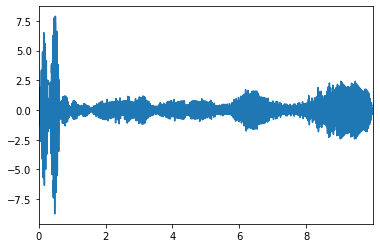

In [57]:
s.realise(44100).plot()

In [23]:
s = detuned_voices("A4", duration=1e3, detune_range=10, n_voices=30)
s = s|detuned_voices(441, duration=1e3, detune_range=10, n_voices=30)
s.play()

In [22]:
detune_range = 30
n_voices = 40
pitch = 441
duration = 5e3
all_cents = [i*detune_range/n_voices - detune_range/2 for i in range(n_voices)]

lst=[Square((10**(cents/(1200*3.322038403))*pitch), duration) for cents in all_cents]
gensound.mix(lst).play()

In [77]:
detuned_voices(400, duration=5e3, detune_range=40, n_voices=30).play()

TypeError: unsupported operand type(s) for ^: 'int' and 'float'

In [62]:
env = {"attack":2000, "decay":0, "sustain":2e3, "release":2e3}
sound = detuned_voices("E3",5e3,40,30) * ADSR(**env)

In [63]:
for note in ["F#4","D4","E4",'A4']:
    sound = sound * Fade(is_in=False, duration=2000) | (detuned_voices(note,5e3,40,30) * ADSR(**env)) * Fade(is_in=True, duration=2000)

In [64]:
sound *= SimpleBandPass(300,3000)
sound.play()

In [59]:
s=detuned_voices("A3",5e3,40,30)
s+=detuned_voices("F4",5e3,40,30)
s.play()

In [58]:
s=detuned_voices(400,5e3,40,30)
s+=detuned_voices(1600,5e3,40,30)
s.play()

# Synthesizer creation

In [ ]:
# 2 LFOS for amplitude modulation
# 2 oscillators for the main sound
# 1 oscillator for the sub bass
# 1 oscillator for the high frequency noise
# 1 oscillator for the low frequency noise
# Filters
# Reverb
# Vibrato
# 2 ADSR envelopes
# Fade in and out
# detuned voices with optional % instead of cents

In [164]:
import json
class Synth():
    def __init__(self, preset='default'):
        self.preset = preset
        if self.preset == 'default':
            # load json file containing default settings
            data = json.load(open('../presets/default.json'))
        self.__dict__ = data
    def _setparam(self, param, value):
        setattr(self, param, value)

    def shift_freq_by_cents(freq, cents):
        return freq*(10**(cents/(1200*3.322038403)))

    def semitones_to_cents(semitones):
        return semitones*100

    def cents_to_semitones(cents):
        return cents/100

    def detuned_voices(pitch, duration, detune_range, n_voices, wave_type='square'):
        # n_voices = how many oscillators in the array
        # detune_range = the difference in cents between the highest and lowest oscillators in the array
        all_cents = [i*detune_range/n_voices - detune_range/2 for i in range(n_voices)] # how much to detune each signal in the array
        # print(isinstance(pitch, str))
        if wave_type == 'sine':
            f = Sine
            match wave_type: # REQUIRES PYTHON 3.10
                case 'sine':
                    f = Sine
                case 'square':
                    f = Square
                case 'triangle':
                    f = Triangle
                case 'sawtooth':
                    f = Sawtooth
        if isinstance(pitch, str):
            # print([f"{pitch}{round(cents):+}" for cents in all_cents])
            return gensound.mix([f(f"{pitch}{round(cents):+}", duration) for cents in all_cents])
        elif (isinstance(pitch, int)) or isinstance(pitch, int):
            return gensound.mix([f(shift_freq_by_cents(pitch,cents),duration) for cents in all_cents])

    def generate_audio(self, pitch,duration):
        # self._update()
        self.pitch = pitch
        # 2 LFOS for amplitude modulation
        self.lfo1 = SineCurve(frequency=self.lfo1_freq, depth=self.lfo1_depth, baseline=0.5, duration=duration)
        self.lfo2 = SineCurve(frequency=self.lfo2_freq, depth=self.lfo2_depth, baseline=0.5, duration=duration)

        # 2 oscillators for the main sound
        self.osc1 = detuned_voices(self.pitch, duration=duration,detune_range = self.osc1_detune, n_voices = self.n_voices, wave_type=self.osc1_wave)
        self.osc2 = detuned_voices(self.pitch, duration=duration,detune_range = self.osc2_detune, n_voices = self.n_voices, wave_type=self.osc2_wave)
        # 1 oscillator for the sub bass
        self.sub_bass = detuned_voices(self.pitch, duration=duration,detune_range = self.sub_detune, n_voices = self.n_voices, wave_type='sine')
        # 1 oscillator for the high frequency noise
        self.high_freq_noise = WhiteNoise(duration=duration)
        # 1 oscillator for the low frequency noise
        self.low_freq_noise = PinkNoise(duration=duration)
        # Filters

        # EFFECTS
        #   - Reverb
        #   - Vibrato

        # AMPLITUDE ENVELOPES
        #   - 2 ADSR envelopes
        #   - Fade in and out

        # apply lfo1 and lfo2 to osc1 and osc2 amplitude
        self.lfo1 = self.osc1 * self.lfo1
        self.lfo1 = self.lfo1 * ADSR(attack=self.attack, decay=self.decay, sustain=self.sustain, release=self.release)
        self.lfo2 = self.osc2 * self.lfo2
        self.lfo2 = self.lfo2 * ADSR(attack=self.attack, decay=self.decay, sustain=self.sustain, release=self.release)

        self.output = self.osc1 + self.osc2 + self.sub_bass + self.high_freq_noise + self.low_freq_noise

        self.output *= Fade(is_in=True, duration=2000)
        self.output *= Fade(is_in=False, duration=2000)
        self.output = self.output * ADSR(attack=self.attack, decay=self.decay, sustain=self.sustain, release=self.release)
        
        return self.output

In [165]:
synth = Synth()
s = synth.generate_audio('A3',5e3)
s.play()

In [136]:
synth._setparam('pitch', 20)

In [144]:
synth.osc1.play()

In [116]:
json.load(open("../presets/default.json"))

{'lfo1_freq': 0.5,
 'lfo1_depth': 0.5,
 'lfo2_freq': 0.5,
 'lfo2_depth': 0.5,
 'osc1_freq': 400,
 'osc1_wave': 'sine',
 'osc2_freq': 400,
 'osc2_wave': 'sine',
 'n_voices': 6,
 'sub_freq': 100,
 'sub_wave': 'sine',
 'hf_noise_freq': 1000,
 'hf_noise_wave': 'sine',
 'lf_noise_freq': 100,
 'lf_noise_wave': 'sine',
 'filter1_type': 'lowpass',
 'filter1_freq': 1000,
 'filter2_type': '',
 'filter2_freq': 0,
 'filter3_type': '',
 'filter3_freq': 0,
 'reverb': 0.5,
 'vibrato_freq': 0.5,
 'vibrato_depth': 0.5,
 'attack': 0.5,
 'decay': 0.5,
 'sustain': 0.5,
 'release': 0.5,
 'fade_in': 0.5,
 'fade_out': 0.5}